<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("../assets/data/seeds.csv")

In [ ]:
# A:

### 2. Do some EDA of relationships between features.

In [4]:
# Plot the Data to see the distributions/relationships
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

In [ ]:
# Check for nulls

In [7]:
# Look at the real species labels.
seeds.species.value_counts()

1    70
2    70
3    70
Name: species, dtype: int64

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [10]:
# A:
X = seeds.drop('species', axis=1)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, random_state=1)
km.fit(X)

KMeans(random_state=1)

### 5. Get the labels and centroids for out first clustering model.

In [31]:
# A:
km.labels_

array([0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 7, 2, 2, 2, 2, 2, 4, 0, 0, 1, 2, 2,
       0, 6, 0, 0, 6, 6, 2, 2, 6, 7, 2, 2, 0, 0, 0, 7, 2, 4, 2, 2, 6, 7,
       2, 2, 0, 2, 2, 0, 2, 7, 2, 2, 0, 0, 2, 0, 0, 6, 6, 6, 6, 2, 6, 6,
       0, 2, 0, 6, 7, 7, 7, 3, 7, 7, 7, 5, 5, 7, 7, 5, 5, 3, 3, 3, 3, 3,
       5, 5, 3, 3, 3, 5, 5, 7, 3, 3, 3, 3, 7, 3, 5, 3, 3, 3, 3, 7, 3, 3,
       3, 3, 3, 5, 5, 3, 5, 3, 3, 3, 5, 3, 7, 3, 7, 5, 5, 3, 3, 7, 3, 3,
       7, 7, 7, 2, 7, 0, 0, 7, 4, 4, 4, 4, 1, 4, 6, 1, 6, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 4, 6, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 4, 6, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       6, 6, 4, 6, 1, 4, 1, 1, 1, 4, 1, 4])

In [32]:
km.labels_
km.cluster_centers_

array([[15.3973913 , 14.82      ,  0.88075652,  5.69347826,  3.35973913,
         1.77578696,  5.30369565],
       [11.67413043, 13.16804348,  0.8454913 ,  5.21017391,  2.81332609,
         4.53654348,  5.10021739],
       [14.20166667, 14.23833333,  0.88028667,  5.4936    ,  3.23506667,
         3.00813333,  5.08066667],
       [18.95454545, 16.38878788,  0.8868    ,  6.24748485,  3.74469697,
         2.72354545,  6.11945455],
       [12.42736842, 13.45736842,  0.86081053,  5.27357895,  2.97563158,
         6.40363158,  5.11868421],
       [19.58333333, 16.646     ,  0.88772667,  6.31586667,  3.83506667,
         5.08153333,  6.1444    ],
       [12.435     , 13.425     ,  0.86675   ,  5.21905   ,  2.9734    ,
         2.410955  ,  4.91815   ],
       [16.52958333, 15.375     ,  0.87835   ,  5.87841667,  3.47758333,
         4.22025   ,  5.70641667]])

In [33]:
seeds['cluster'] = km.labels_
seeds.head(12)

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,2
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1,2
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1,2
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,0
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,0


### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [38]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

X_scaled

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [39]:
seeds.groupby('cluster').mean()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
cluster,,,,,,,,
0,15.397391,14.820000,0.880757,5.693478,3.359739,1.775787,5.303696,1.086957
1,11.674130,13.168043,0.845491,5.210174,2.813326,4.536543,5.100217,2.956522
2,14.201667,14.238333,0.880287,5.493600,3.235067,3.008133,5.080667,1.033333
3,18.954545,16.388788,0.886800,6.247485,3.744697,2.723545,6.119455,2.000000
4,12.427368,13.457368,0.860811,5.273579,2.975632,6.403632,5.118684,2.789474
5,19.583333,16.646000,0.887727,6.315867,3.835067,5.081533,6.144400,2.000000
6,12.435000,13.425000,0.866750,5.219050,2.973400,2.410955,4.918150,1.800000
7,16.529583,15.375000,0.878350,5.878417,3.477583,4.220250,5.706417,1.791667


In [40]:
silhouette_score(X_scaled, seeds['cluster'], metric='euclidean')

0.2202130346669465

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','orange', 'black','white', 'purple'])

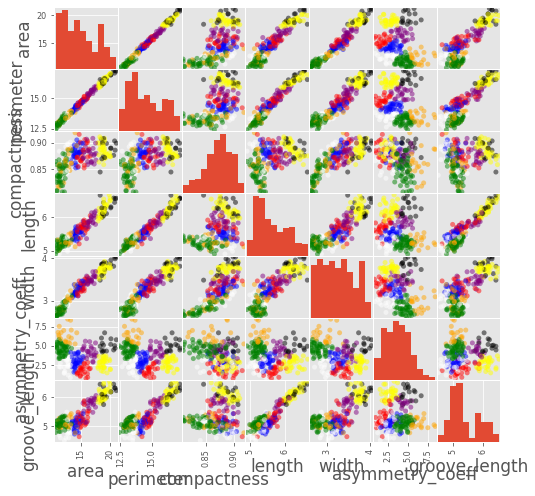

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, c=colors[seeds.cluster], figsize=(8,8), s=100);

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [37]:
import random

random.randint(1,25), random.randint(1,25)

(16, 8)

In [65]:
# A:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=1)
km.fit(X)

KMeans(n_clusters=4, random_state=1)

In [66]:
km.labels_
km.cluster_centers_

array([[13.39108696, 13.86521739,  0.87424565,  5.366     ,  3.11428261,
         2.41580652,  4.99067391],
       [18.96296296, 16.39666667,  0.88595185,  6.24272222,  3.74992593,
         3.54033333,  6.10077778],
       [11.91439394, 13.26151515,  0.85024242,  5.23122727,  2.86393939,
         5.06828788,  5.10534848],
       [15.71909091, 14.97659091,  0.88038636,  5.74518182,  3.3985    ,
         3.18704773,  5.44838636]])

In [67]:
seeds['cluster'] = km.labels_
seeds.head(12)

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,3
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,3
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1,3
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1,0
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,3
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,3


In [68]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

X_scaled

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [69]:
seeds.groupby('cluster').mean()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
cluster,,,,,,,,
0,13.391087,13.865217,0.874246,5.366000,3.114283,2.415807,4.990674,1.347826
1,18.962963,16.396667,0.885952,6.242722,3.749926,3.540333,6.100778,2.000000
2,11.914394,13.261515,0.850242,5.231227,2.863939,5.068288,5.105348,2.878788
3,15.719091,14.976591,0.880386,5.745182,3.398500,3.187048,5.448386,1.363636


In [70]:
silhouette_score(X_scaled, seeds['cluster'], metric='euclidean')

0.29247810931197027

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','orange', 'black','white', 'purple'])

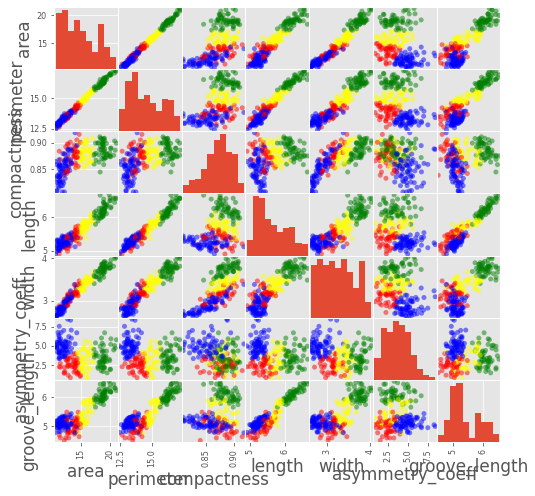

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, c=colors[seeds.cluster], figsize=(8,8), s=100);

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [73]:
# A:
def plot_inertia_values(k_min, k_max):
    inertia_values = []
    k_values = range(k_min, k_max+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    fig, ax = plt.subplots()
    ax.plot(k_values, inertia_values)
    ax.set_title("Inertia values for different $k$")
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia")
    #ax.set_ylim((0, 300))
    ax.set_xticks(k_values)
    plt.show()
